## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load datasets

In [2]:
customers = pd.read_csv('/content/drive/MyDrive/Zeotap_Assignment/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Zeotap_Assignment/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Zeotap_Assignment/Transactions.csv')

# Convert date columns to datetime

In [3]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


# Merge datasets

In [4]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


# **EDA**

# 1. Overview of the dataset

In [5]:
print("Customers:\n", customers.info(), "\n")
print("Products:\n", products.info(), "\n")
print("Transactions:\n", transactions.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
Customers:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
Products:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 

# 2. Descriptive statistics

In [6]:
print("Descriptive statistics:\n", merged_data.describe())

Descriptive statistics:
                      TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              

# 3. Missing values

In [7]:
print("Missing values:\n", merged_data.isnull().sum())

Missing values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


# 4. Top products by sales

In [8]:
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Sales:\n", top_products)


Top 10 Products by Sales:
 ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


# 5. Sales trends over time

In [9]:
sales_trend = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print("Monthly Sales Trend:\n", sales_trend)

Monthly Sales Trend:
 TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


# 6. Customer acquisition trends

In [10]:
signup_trend = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
print("Customer Signup Trend:\n", signup_trend)


Customer Signup Trend:
 SignupDate
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, Name: count, dtype: int64


# 7. Region-wise analysis

In [11]:
region_sales = merged_data.groupby('Region')['TotalValue'].sum()
print("Region-wise Sales:\n", region_sales)

Region-wise Sales:
 Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


# ** Visualization**

# Top products by sales

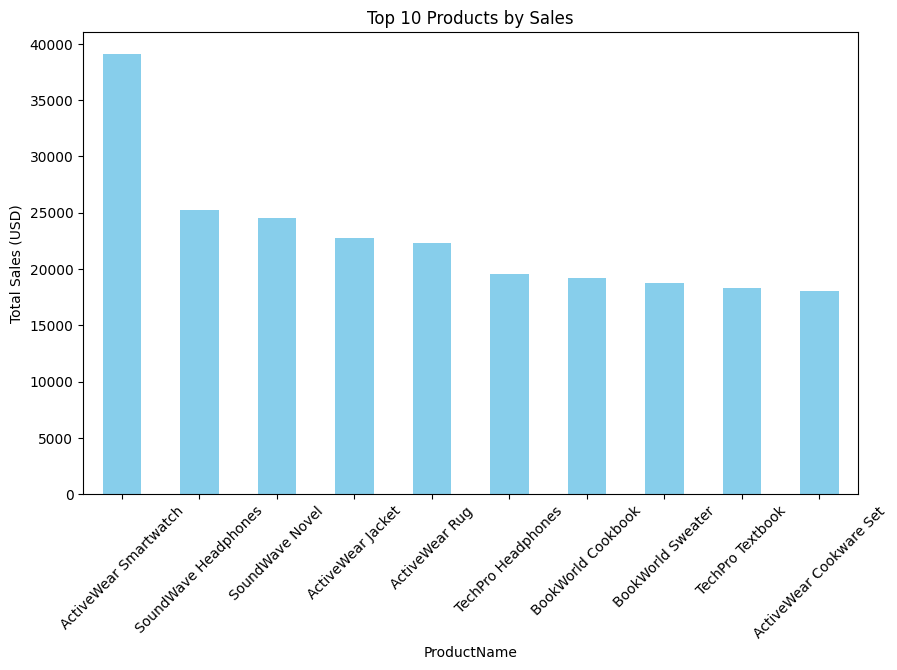

In [19]:
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Sales')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()


# Monthly sales trend

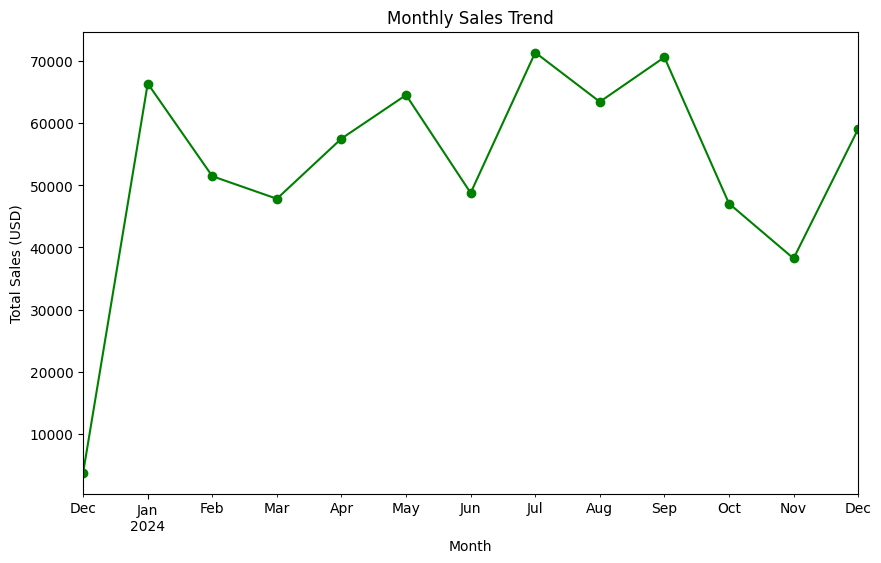

In [14]:
plt.figure(figsize=(10, 6))
sales_trend.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Month')
plt.show()

# Region-wise sales

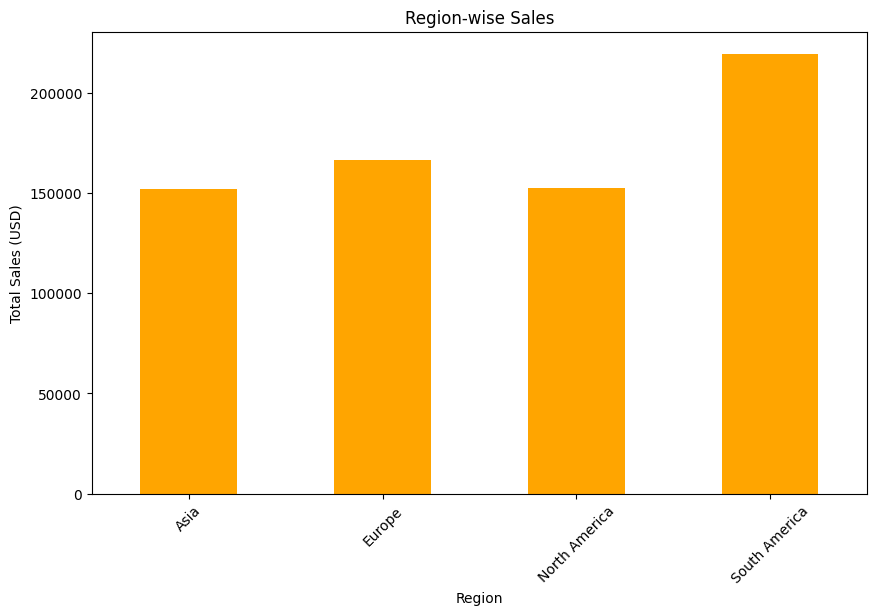

In [20]:
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='orange')
plt.title('Region-wise Sales')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()


# Customer acquisition trend

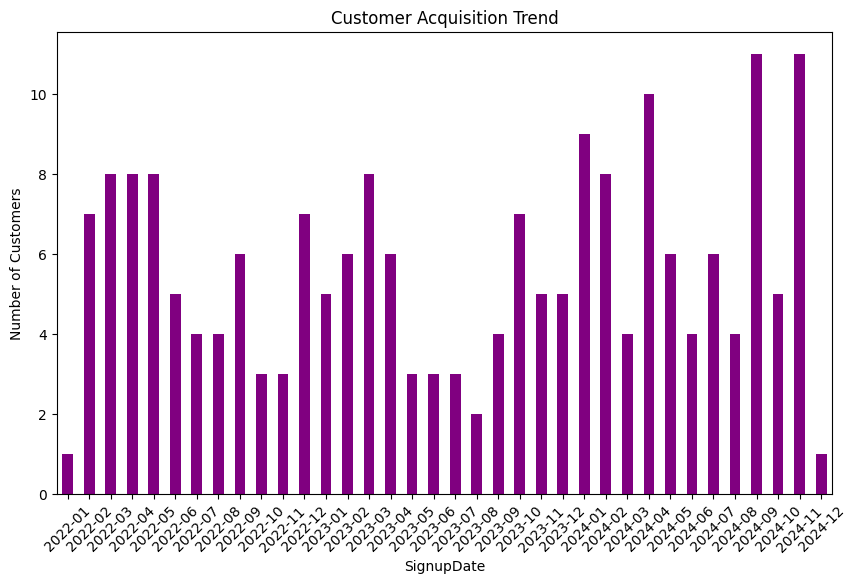

In [21]:
plt.figure(figsize=(10, 6))
signup_trend.plot(kind='bar', color='purple')
plt.title('Customer Acquisition Trend')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()